In [15]:
import string 
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [1]:
data = open('file.txt', encoding='utf-8').read()

In [3]:
#converting text to lower and removing punctuation
data = data.lower().translate(str.maketrans('', '', string.punctuation))

In [6]:
#tokenization 
tokenized_data = word_tokenize(data, 'english')

In [7]:
#removing stop words
l = []
for i in tokenized_data:
    if i not in stopwords.words('english'):
        l.append(i)

In [9]:
#lemmatization
words = []
lemma = WordNetLemmatizer()
for word in l:
    word = lemma.lemmatize(word)
    words.append(word)

In [10]:
emotions = []
with open('emotions.txt') as f:
    for line in f:
        word, emotion = line.translate(str.maketrans('', '', "\n,' ")).strip().split(':')
        if word in words:
            emotions.append(emotion)

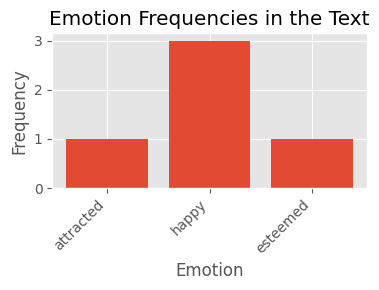

In [14]:
c = dict(Counter(emotions))

plt.figure(figsize=(4, 3))
plt.bar(c.keys(), c.values())
plt.title('Emotion Frequencies in the Text')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()